1. 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd

In [28]:
data = pd.read_csv('./1hz_data/1hzdata/0822_0902_1hz.csv',index_col=0)
data.index[0], data.index[-1]

('2023.08.22 15:26:18.991', '2023.09.04 15:28:05.331')

### 1. 버리는 용

In [4]:
#data['Time'] = pd.to_datetime(data['Time']).dt.strftime('%Y.%m.%d %H:%M:%S')
data['Time'] = pd.to_datetime(data['Time'])
print(len(data))

1110460


In [5]:
delta =data['Time'].diff()[1:]

In [6]:
print(len(delta))
delta.value_counts().sort_index()

1110459


Time
0 days 00:00:00.072000    13
0 days 00:00:00.073000     1
0 days 00:00:00.076000    13
0 days 00:00:00.077000     3
0 days 00:00:00.080000    63
                          ..
0 days 00:13:58.809000     1
0 days 00:16:18.309000     1
0 days 00:30:08.125000     1
0 days 01:06:46.862000     1
0 days 02:01:58.486000     1
Name: count, Length: 102, dtype: int64

In [7]:
# time_delta 계산하고 별도의 데이터프레임에 저장
time_delta_df = pd.DataFrame()
time_delta_df['time_delta'] = data['Time'].diff()

# 2초 이상의 time delta를 가진 위치 찾기
split_indices = time_delta_df[time_delta_df['time_delta'] >= pd.Timedelta(seconds=1.5)].index.tolist()

# 데이터프레임 분리
sliced = []
start = 0
for idx in split_indices:
    sliced.append(data.iloc[start:idx])
    start = idx
sliced.append(data.iloc[start:])

In [8]:
for dataframe in sliced:
    print(f"처음: {dataframe['Time'].iloc[0]}, 끝: {dataframe['Time'].iloc[-1]}")
    temp_delta = dataframe['Time'].diff()[1:].sort_values()
    print(temp_delta.iloc[-3:])
    print(np.where(temp_delta > pd.Timedelta(seconds=1.5))[0])
    print()

처음: 2023-08-22 15:26:18.991000, 끝: 2023-08-22 18:44:21.124000
9145   0 days 00:00:01.029000
8910   0 days 00:00:01.030000
7070   0 days 00:00:01.188000
Name: Time, dtype: timedelta64[ns]
[]

처음: 2023-08-22 19:00:39.433000, 끝: 2023-08-23 10:25:11.954000
64782   0 days 00:00:01.003000
41921   0 days 00:00:01.024000
15316   0 days 00:00:01.123000
Name: Time, dtype: timedelta64[ns]
[]

처음: 2023-08-23 10:55:20.079000, 끝: 2023-08-23 14:05:11.460000
70311   0 days 00:00:01.003000
68389   0 days 00:00:01.003000
70653   0 days 00:00:01.003000
Name: Time, dtype: timedelta64[ns]
[]

처음: 2023-08-23 15:11:58.322000, 끝: 2023-08-23 16:58:53.693000
85041   0 days 00:00:01.003000
82979   0 days 00:00:01.003000
83899   0 days 00:00:01.008000
Name: Time, dtype: timedelta64[ns]
[]

처음: 2023-08-23 19:00:52.179000, 끝: 2023-08-23 23:09:55.111000
90922   0 days 00:00:01.011000
93904   0 days 00:00:01.011000
96563   0 days 00:00:01.011000
Name: Time, dtype: timedelta64[ns]
[]

처음: 2023-08-23 23:22:09.167000, 끝

In [9]:
#for dataframe in sliced:
#    dataframe.set_index('Time', inplace=True)
temp_data = sliced[0]

<Axes: >

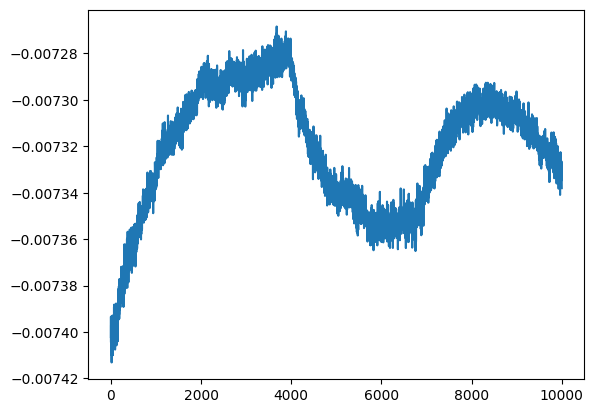

In [10]:
data['z'].iloc[:10000].plot()

In [11]:
red_lines = [
"2023-08-28 23:08:00","2023-09-04 14:12","2023-09-04 11:09","2023-09-04 8:42","2023-09-02 14:22","2023-09-02 10:15",
"2023-09-02 6:00","2023-09-02 2:53","2023-09-01 22:26","2023-09-01 18:24","2023-09-01 14:18","2023-09-01 10:15"
,"2023-09-01 5:54","2023-09-01 2:08","2023-08-31 23:04","2023-08-31 18:42","2023-08-31 14:20","2023-08-31 10:00"
,"2023-08-31 5:57","2023-08-31 2:13","2023-08-30 22:18","2023-08-30 18:13","2023-08-30 14:41","2023-08-30 10:24"
,"2023-08-30 6:05","2023-08-30 2:19","2023-08-29 23:08","2023-08-29 20:23","2023-08-29 18:49","2023-08-29 16:27"
,"2023-08-29 10:07","2023-08-29 3:08","2023-08-28 23:08","2023-08-28 15:42","2023-08-28 13:39","2023-08-28 11:21"
,"2023-08-28 9:17","2023-08-26 15:40","2023-08-26 13:40","2023-08-26 11:02","2023-08-26 9:27","2023-08-26 6:24"
,"2023-08-26 3:39","2023-08-26 1:06","2023-08-25 21:42","2023-08-25 18:56","2023-08-25 16:17","2023-08-25 14:08"
,"2023-08-25 13:11","2023-08-25 11:07","2023-08-25 9:11","2023-08-25 6:57","2023-08-25 5:25","2023-08-25 3:28"
,"2023-08-25 1:32","2023-08-24 21:16","2023-08-24 18:26","2023-08-24 17:00","2023-08-24 16:15","2023-08-24 15:15"
,"2023-08-24 14:15","2023-08-24 12:40","2023-08-24 11:18","2023-08-24 10:18","2023-08-24 8:35","2023-08-24 7:05"
,"2023-08-24 5:47","2023-08-24 3:35","2023-08-24 0:50","2023-08-23 21:11","2023-08-23 18:58","2023-08-23 17:28"
,"2023-08-23 15:36","2023-08-23 12:55","2023-08-23 10:46","2023-08-23 6:09","2023-08-23 3:26"
]

### 2. tool 교체 기반 split

In [53]:
tool = pd.read_excel('신스윈툴교체.xlsx')

In [54]:
upper = tool[tool['enddatetime']>data.index[0]]
under = upper[tool['enddatetime']<data.index[-1]]
under.to_csv('tool.csv')
under=under['enddatetime']
under.reset_index(inplace=True, drop=True)


C:\Users\na062\AppData\Local\Temp\ipykernel_30496\3714682051.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  under = upper[tool['enddatetime']<data.index[-1]]


In [55]:
upper = under.copy()
upper.loc[len(upper)] = data.index[0]
upper.drop(0,inplace=True)
upper.reset_index(inplace=True, drop=True)
upper = pd.to_datetime(upper)
under = pd.to_datetime(under)

In [56]:
data.index = pd.to_datetime(data.index)
split = []
for up,down in zip(upper,under):
    split.append(data[up:down])

In [57]:
[data.to_csv(f'./data_split/{i+1}.csv') for i, data in enumerate(split)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]